In [2]:
#generic imports
import csv
from datetime import datetime
import os

#Viz
import matplotlib.pyplot as plt

# Data manipulation
import pandas as pd
import geopandas as gpd
import shapely.geometry

# Numerical stuff
import numpy as np

# Zofe spectroscopic data analysis

This notebook serves as an introduction on how to analyse spectroscopic datasets from Zofe

In [52]:
# define sets of data path
base_treatment_path = "../../../../data/field_experiments/ZOFE"
zofe_data = {"20200624": {"data": os.path.join(base_treatment_path, "20200624_ZOFE"),
                          "treatment_map": os.path.join(base_treatment_path, "treatment_map_ZOFE_20200624.csv")},
             "20200707": {"data": os.path.join(base_treatment_path, "20200707_ZOFE"),
                          "treatment_map": os.path.join(base_treatment_path, "treatment_map_ZOFE_20200707.csv")}}
demo_data = {"20200625": {"data": os.path.join(base_treatment_path, "20200625_DEMO"),
                          "treatment_map": os.path.join(base_treatment_path, "treatment_map_DEMO_20200625.csv")},
             "20200707": {"data": os.path.join(base_treatment_path, "20200707_DEMO"),
                          "treatment_map": os.path.join(base_treatment_path, "treatment_map_DEMO_20200707.csv")}}

def read_treatment(treatment_file_path):
    df = pd.read_csv(zofe_data["20200624"]["treatment_map"], delimiter=";")
    return df

def read_spectroscope(spectroscope_directory):
    sed_files = map(lambda x: os.path.join(spectroscope_directory,x), os.listdir(spectroscope_directory))
    measurements = {}
    for sed_file in sed_files:
        # Extract measurment id from filename
        measurement_id = sed_file[-7:-4] # string like 234
        #Read file
        lines = open(sed_file,'r').read().splitlines()
        #Fill in dictionary with first entries of files until "Data:" keyword
        measurement_d = {}
        for i, line in enumerate(lines):
            # Split each line into key: value
            s = line.split(":")
            k,v = s[0], ":".join(s[1:]).lstrip()
            if k == "Data":
                break
            measurement_d[k] = v
        # Now all following entries will be actual spectrometer measurments
        actual_measurment = {k:[] for k in lines[i+1].split("\t")}
        for j in range(i+2, len(lines)):
            for entry, value in zip(actual_measurment, lines[j].split("\t")):
                actual_measurment[entry].append(float(value))
        measurement_d["data"] = actual_measurment
        # Now, we customize a few entries with string <-> specific python objects
        measurement_d["date"] = datetime.strptime(measurement_d["Date"].split(",")[-1], '%m/%d/%Y')
        measurement_d["start_time"] = (datetime.strptime(measurement_d["Time"].split(",")[0].split(".")[0],
                                                         "%H:%M:%S").time())
        measurement_d["end_time"] = (datetime.strptime(measurement_d["Time"].split(",")[1].split(".")[0],
                                                         "%H:%M:%S").time())
        measurement_d["coordinates"] = shapely.geometry.Point((float(measurement_d["Latitude"][:-1]),
                                                               float(measurement_d["Longitude"][:-1])))
        measurements[measurement_id] = measurement_d
    return gpd.GeoDataFrame(pd.DataFrame(measurements).transpose(), geometry="coordinates")

In [8]:
measurements = read_spectroscope(zofe_data["20200624"]["data"])
measurements

,Comment,Version,File Name,Instrument,Detectors,Measurement,Date,Time,Temperature (C),Battery Voltage,...,GPS Time,Satellites,Calibrated Reference Correction File,Channels,Columns [2],data,date,start_time,end_time,coordinates
175,,2.3[3.0.7228],C:\Users\Algiz 8x\Documents\20200624_ZOFE\PSR+...,PSR+3500_19B60C9,"512,256,256",REFLECTANCE,"06/24/2020,06/24/2020","12:29:13.38,12:31:27.93","46.44,9.28,-3.69,46.76,9.01,-3.49","6.96,6.89",...,10:28:33 AM,12,none,2151,,"{'Wvl': [350.0, 351.0, 352.0, 353.0, 354.0, 35...",2020-06-24,12:29:13,12:31:27,POINT (47.4268 8.5191)
198,,2.3[3.0.7228],C:\Users\Algiz 8x\Documents\20200624_ZOFE\PSR+...,PSR+3500_19B60C9,"512,256,256",REFLECTANCE,"06/24/2020,06/24/2020","12:47:05.64,12:48:04.91","47.24,9.21,-4.83,47.00,9.48,-4.90","6.86,6.86",...,10:45:09 AM,9,none,2151,,"{'Wvl': [350.0, 351.0, 352.0, 353.0, 354.0, 35...",2020-06-24,12:47:05,12:48:04,POINT (47.4269 8.5185)
204,,2.3[3.0.7228],C:\Users\Algiz 8x\Documents\20200624_ZOFE\PSR+...,PSR+3500_19B60C9,"512,256,256",REFLECTANCE,"06/24/2020,06/24/2020","12:52:06.00,12:54:12.31","46.36,9.28,-5.37,45.71,9.21,-5.37","6.99,6.99",...,10:51:17 AM,11,none,2151,,"{'Wvl': [350.0, 351.0, 352.0, 353.0, 354.0, 35...",2020-06-24,12:52:06,12:54:12,POINT (47.427 8.5189)
212,,2.3[3.0.7228],C:\Users\Algiz 8x\Documents\20200624_ZOFE\PSR+...,PSR+3500_19B60C9,"512,256,256",REFLECTANCE,"06/24/2020,06/24/2020","12:52:06.00,12:57:10.73","46.36,9.28,-5.37,45.07,9.21,-5.44","6.99,6.93",...,10:54:15 AM,12,none,2151,,"{'Wvl': [350.0, 351.0, 352.0, 353.0, 354.0, 35...",2020-06-24,12:52:06,12:57:10,POINT (47.427 8.519299999999999)
219,,2.3[3.0.7228],C:\Users\Algiz 8x\Documents\20200624_ZOFE\PSR+...,PSR+3500_19B60C9,"512,256,256",REFLECTANCE,"06/24/2020,06/24/2020","12:57:36.73,13:01:02.28","45.07,9.21,-5.44,44.83,9.28,-5.37","6.99,6.89",...,10:58:07 AM,8,none,2151,,"{'Wvl': [350.0, 351.0, 352.0, 353.0, 354.0, 35...",2020-06-24,12:57:36,13:01:02,POINT (47.4269 8.5189)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,,2.3[3.0.7228],C:\Users\Algiz 8x\Documents\20200624_ZOFE\PSR+...,PSR+3500_19B60C9,"512,256,256",REFLECTANCE,"06/24/2020,06/24/2020","12:57:36.73,12:57:59.84","45.07,9.21,-5.44,45.07,9.21,-5.44","6.99,6.90",...,10:55:05 AM,12,none,2151,,"{'Wvl': [350.0, 351.0, 352.0, 353.0, 354.0, 35...",2020-06-24,12:57:36,12:57:59,POINT (47.4269 8.519299999999999)
188,,2.3[3.0.7228],C:\Users\Algiz 8x\Documents\20200624_ZOFE\PSR+...,PSR+3500_19B60C9,"512,256,256",REFLECTANCE,"06/24/2020,06/24/2020","12:42:36.93,12:42:51.54","47.65,9.28,-3.89,47.65,9.35,-4.03","6.81,6.88",...,10:39:56 AM,11,none,2151,,"{'Wvl': [350.0, 351.0, 352.0, 353.0, 354.0, 35...",2020-06-24,12:42:36,12:42:51,POINT (47.4266 8.5189)
229,,2.3[3.0.7228],C:\Users\Algiz 8x\Documents\20200624_ZOFE\PSR+...,PSR+3500_19B60C9,"512,256,256",REFLECTANCE,"06/24/2020,06/24/2020","13:05:29.75,13:06:23.74","44.83,9.28,-5.44,44.75,9.28,-5.44","6.89,6.87",...,11:03:28 AM,11,none,2151,,"{'Wvl': [350.0, 351.0, 352.0, 353.0, 354.0, 35...",2020-06-24,13:05:29,13:06:23,POINT (47.4268 8.519399999999999)
157,,2.3[3.0.7228],C:\Users\Algiz 8x\Documents\20200624_ZOFE\PSR+...,PSR+3500_19B60C9,"512,256,256",REFLECTANCE,"06/24/2020,06/24/2020","12:15:17.94,12:19:13.68","44.50,9.21,-5.30,45.15,9.21,-4.90","7.00,6.99",...,10:16:18 AM,9,none,2151,,"{'Wvl': [350.0, 351.0, 352.0, 353.0, 354.0, 35...",2020-06-24,12:15:17,12:19:13,POINT (47.4269 8.518800000000001)


In [33]:
measurements.iloc[0]

Comment                                                                                  
Version                                                                     2.3[3.0.7228]
File Name                               C:\Users\Algiz 8x\Documents\20200624_ZOFE\PSR+...
Instrument                                                               PSR+3500_19B60C9
Detectors                                                                     512,256,256
Measurement                                                                   REFLECTANCE
Date                                                                06/24/2020,06/24/2020
Time                                                              12:29:13.38,12:31:27.93
Temperature (C)                                         46.44,9.28,-3.69,46.76,9.01,-3.49
Battery Voltage                                                                 6.96,6.89
Averages                                                                            50,50
Integratio

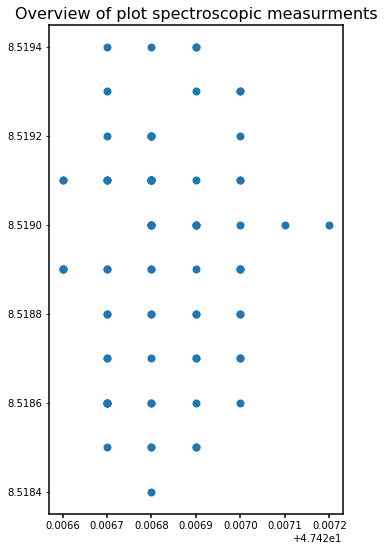

In [4]:
fig, ax = plt.subplots(1, figsize=(16,9))
ax.set_title(f"Overview of plot spectroscopic measurments")
measurements.plot(ax=ax)
plt.show()

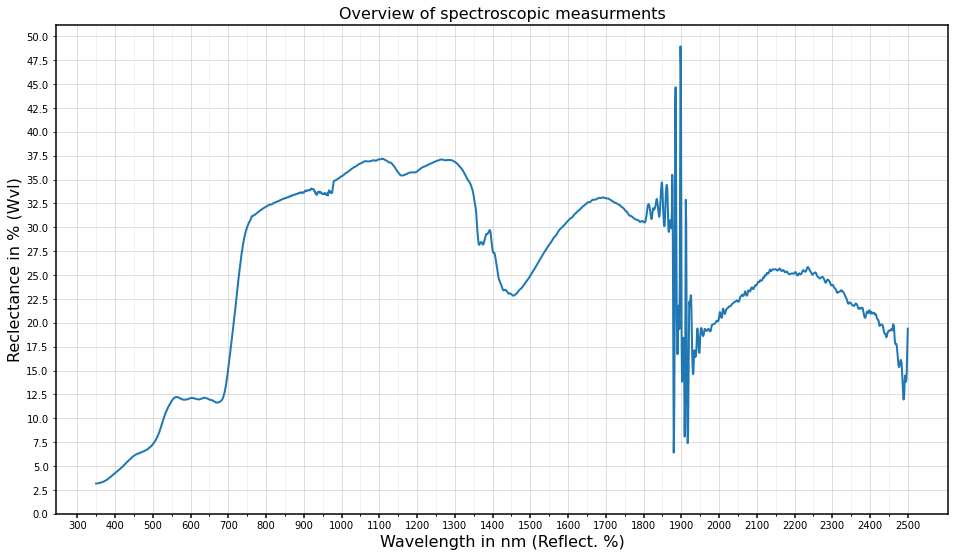

In [132]:
#example with first measurment
xname, yname = measurements.data[0].keys()
x,y = [measurements.data[0][k] for k in [xname, yname]]
fig, ax = plt.subplots(1, figsize=(16,9))
ax.set_title(f"Overview of spectroscopic measurments")
ax.plot(x,y)
ax.set_xlabel(f"Wavelength in nm ({yname})")
ax.set_ylabel(f"Reclectance in % ({xname})")
# Major ticks every 20, minor ticks every 5
ax.set_xticks(np.linspace(300,2500,23))
ax.set_xticks(np.linspace(350,2500,44), minor=True)
ax.set_yticks(np.linspace(0,50,21))
# And a corresponding grid
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
plt.show()


In [34]:
# Just in order to test
treatment_map = read_treatment(zofe_data["20200624"]["treatment_map"])
treatment_map

,My_order_of_passage,Treatment_number,Treatment_name,Treatment_repetition,Measurement_number
0,1,1,NullParzelle,1,221
1,2,7,KlärschlammPK,2,214
2,3,10,PK100200,3,229
3,4,4,getrockneterKompost,4,177
4,5,2,Stallmist,5,181
5,6,2,Stallmist,1,210
6,7,8,KompostPK,2,215
7,8,11,NPK,3,230
8,9,5,50PKundN,4,176
9,10,3,getrockneterKlärschlamm,5,182


In [54]:
treatment_map = read_treatment(zofe_data["20200624"]["treatment_map"])


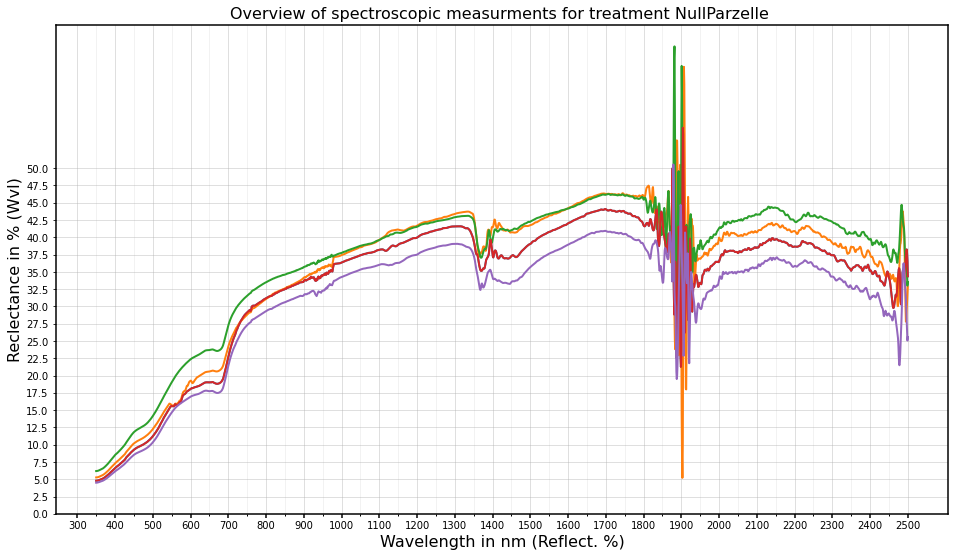

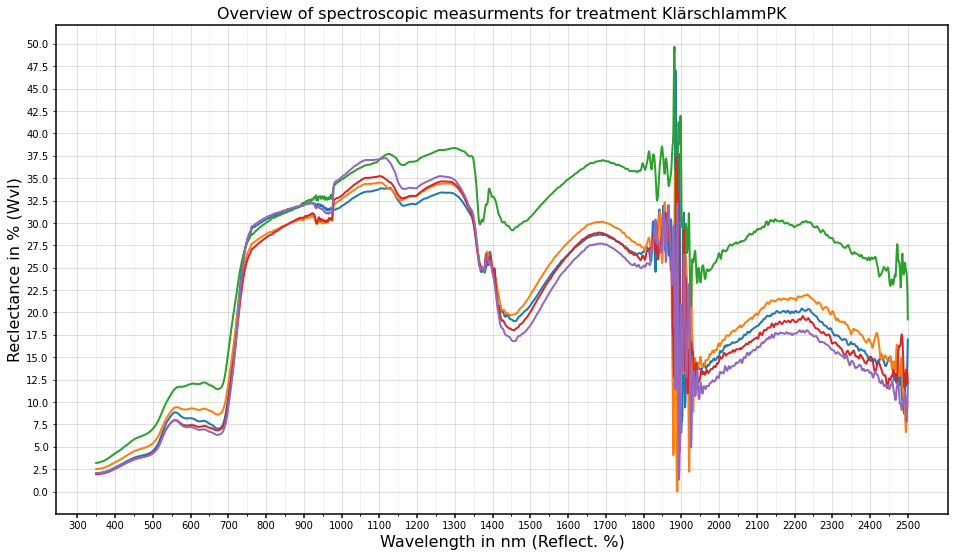

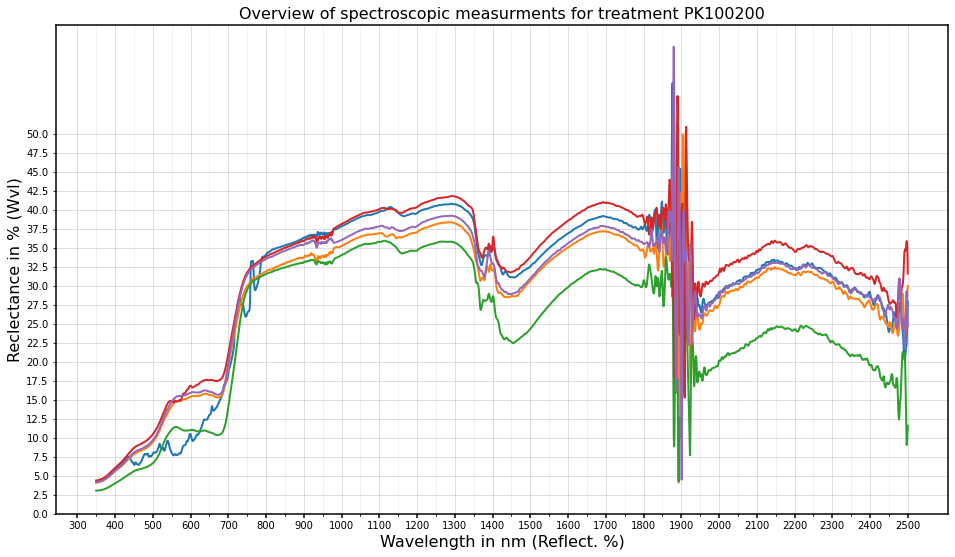

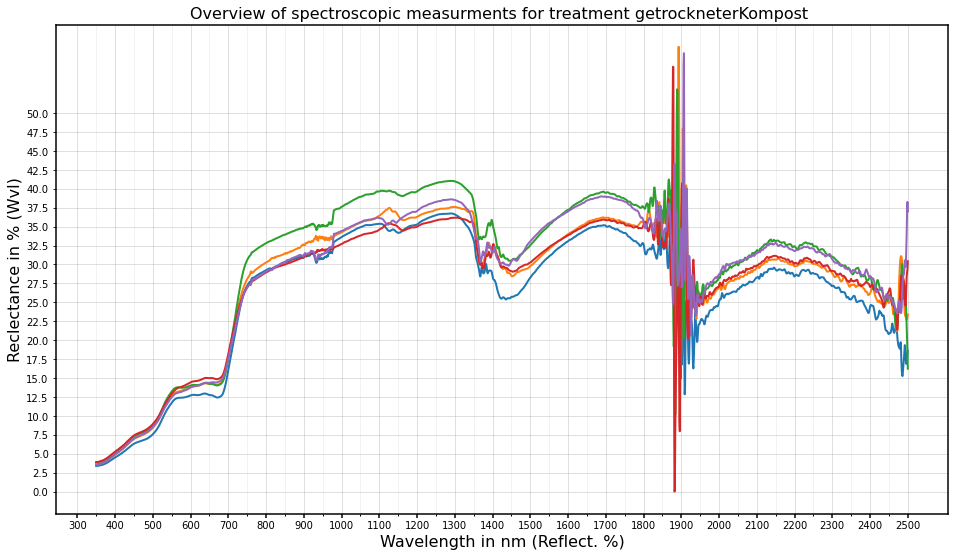

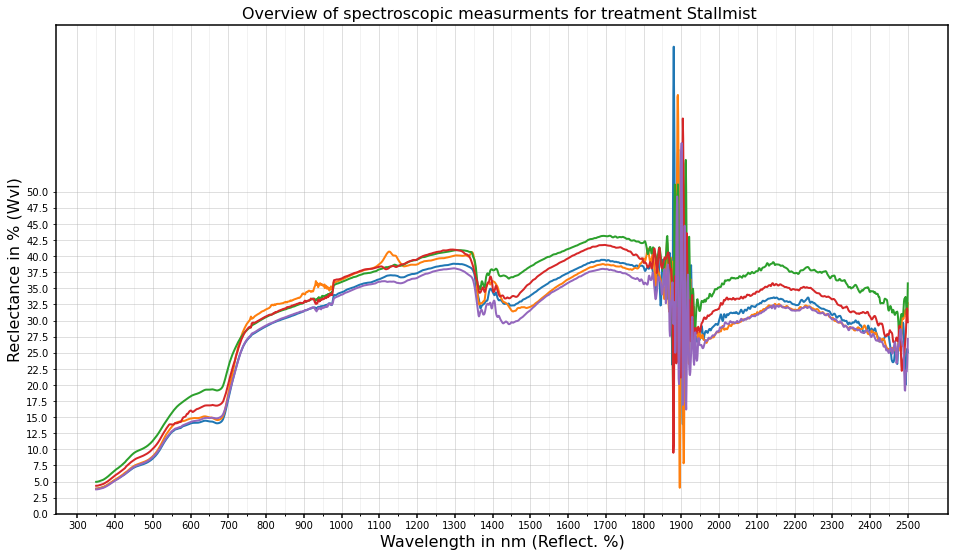

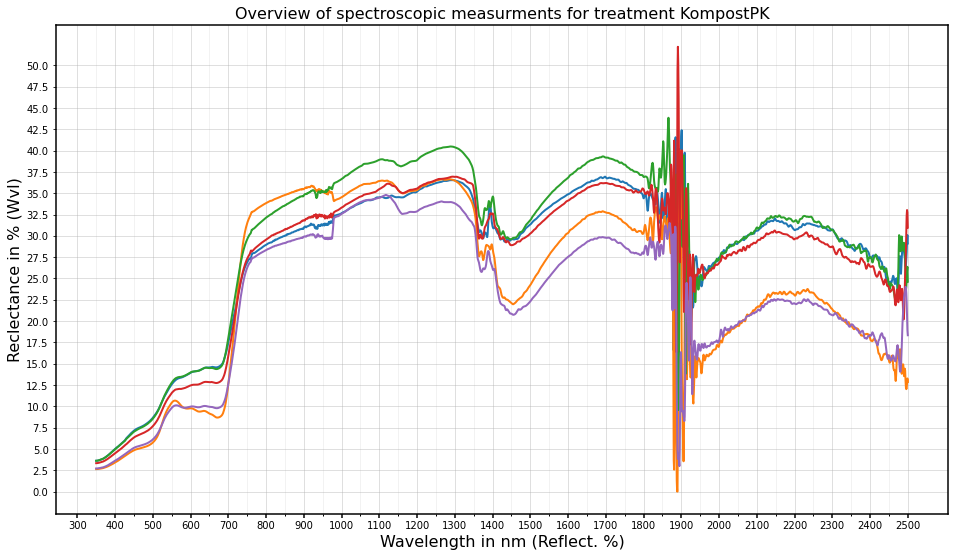

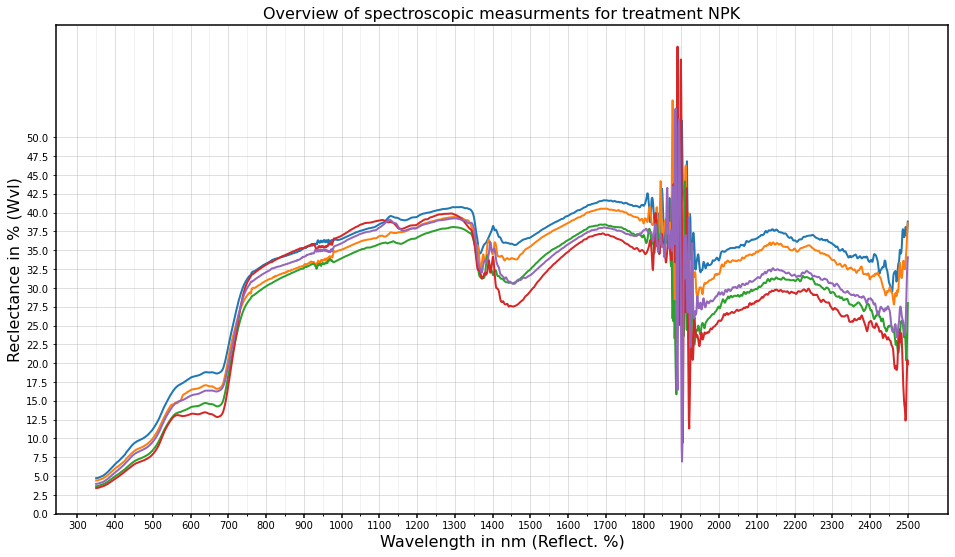

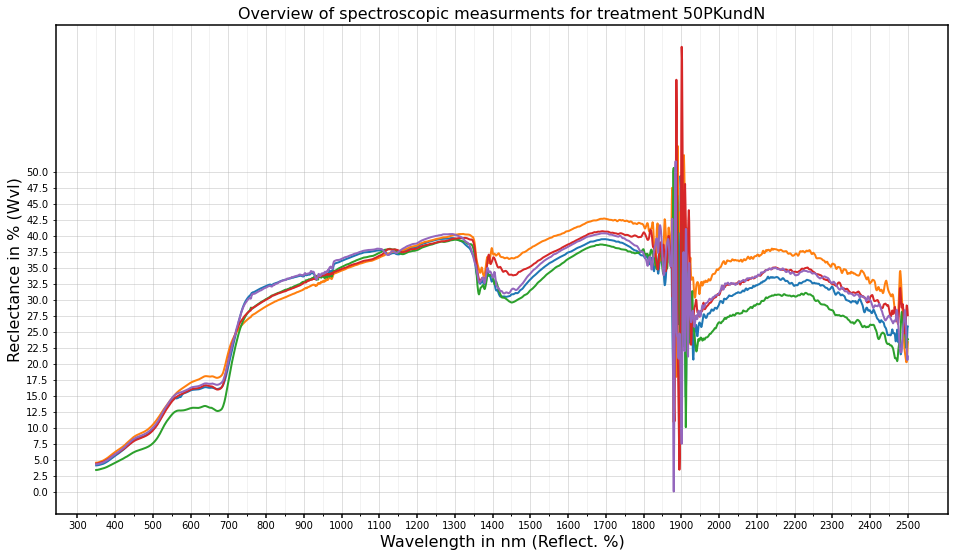

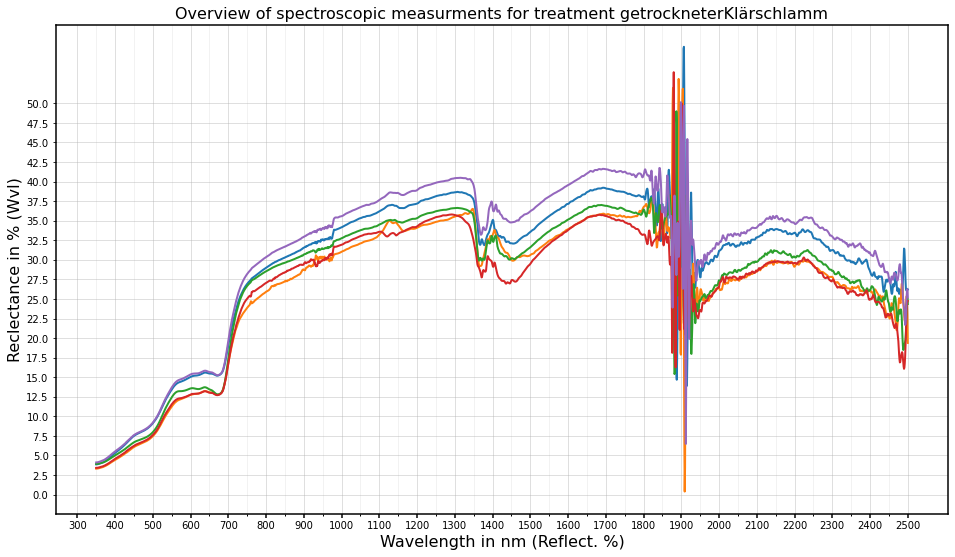

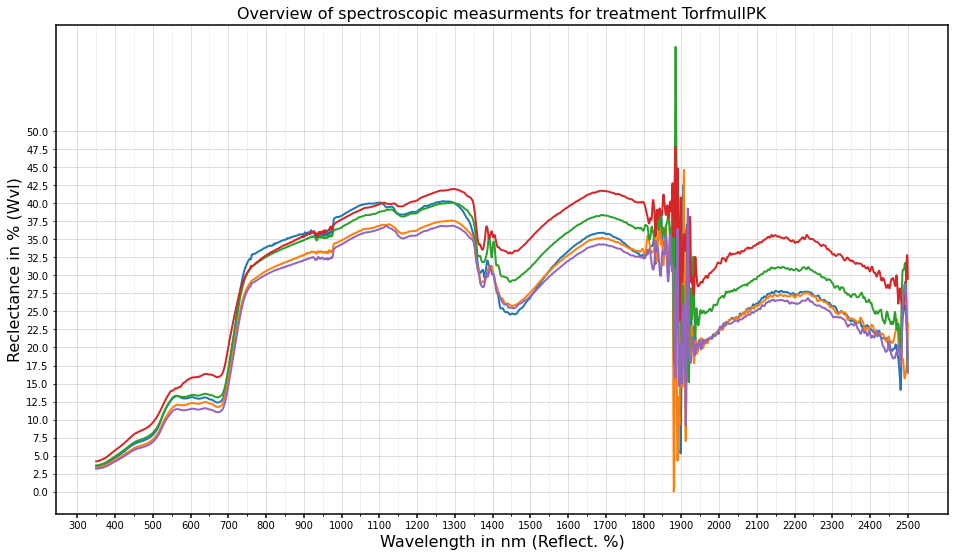

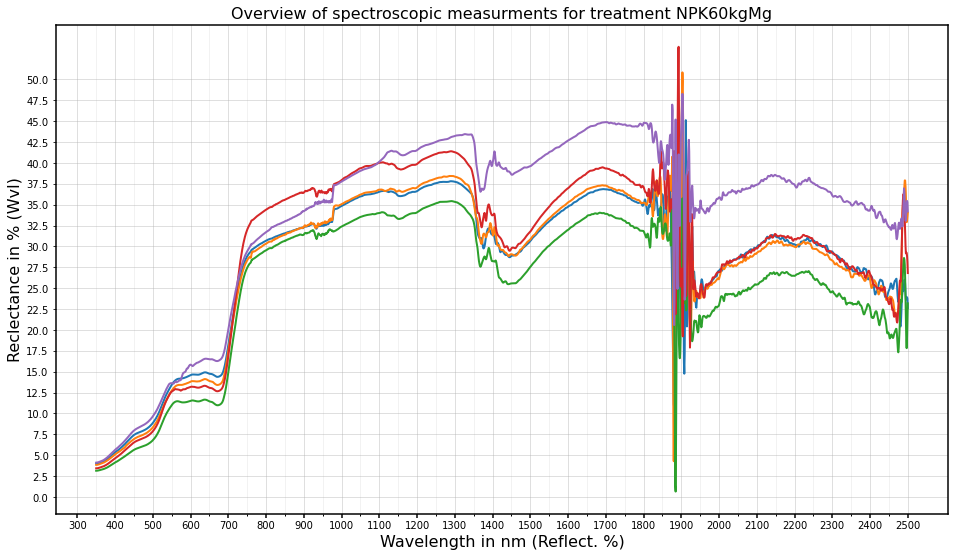

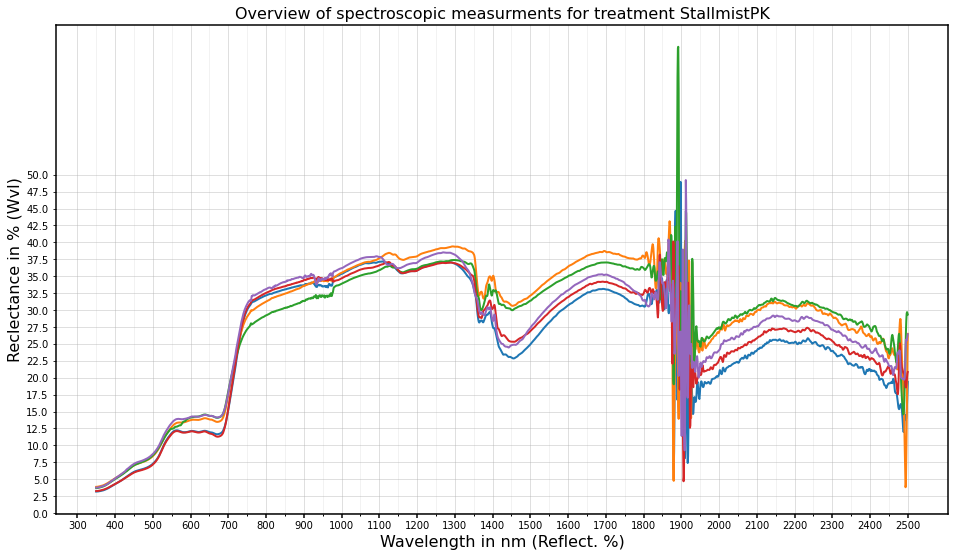

In [133]:
treatment_map = read_treatment(zofe_data["20200624"]["treatment_map"])
measurements = read_spectroscope(zofe_data["20200624"]["data"])

# Now get individual treatments
treatments_ids = treatment_map.loc[:,"Treatment_number"].unique()
spectra = {}
#measurements
for treatment_id in treatments_ids:
    # First, get the treatment name back from the csv
    treatment_name = treatment_map[treatment_map["Treatment_number"]==treatment_id].Treatment_name
    treatment_name = treatment_name.iloc[0]
    
    # Now find the least of measurments for that treatment
    treatment_number_list = treatment_map[treatment_map["Treatment_number"]==treatment_id].Measurement_number
    
    #Now plot
    xname, yname = measurements.data[0].keys()
    fig, ax = plt.subplots(1, figsize=(16,9))
    ax.set_title(f"Overview of spectroscopic measurments for treatment {treatment_name}")
    
    for treatment_number in treatment_number_list:
        #print(treatment_number)
        meas = measurements.loc[str(treatment_number)]
        x,y = [meas.data[k] for k in [xname, yname]]
        ax.plot(x,y)
        
    ax.set_xlabel(f"Wavelength in nm ({yname})")
    ax.set_ylabel(f"Reclectance in % ({xname})")
    
    # Major ticks every 20, minor ticks every 5
    ax.set_xticks(np.linspace(300,2500,23))
    ax.set_xticks(np.linspace(350,2500,44), minor=True)
    ax.set_yticks(np.linspace(0,50,21))
    # And a corresponding grid
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)
    plt.show()
        
    #measurments_ids = [el.Measurement_number for el in treatment_map]
    #res = measurements[measurements[]treatment_id]
    #print(res)

In [114]:
measurements.loc["221"]

Comment                                                                                  
Version                                                                     2.3[3.0.7228]
File Name                               C:\Users\Algiz 8x\Documents\20200624_ZOFE\PSR+...
Instrument                                                               PSR+3500_19B60C9
Detectors                                                                     512,256,256
Measurement                                                                   REFLECTANCE
Date                                                                06/24/2020,06/24/2020
Time                                                              12:57:36.73,13:01:57.44
Temperature (C)                                         45.07,9.21,-5.44,44.83,9.28,-5.17
Battery Voltage                                                                 6.99,6.88
Averages                                                                            50,50
Integratio

## ZOFE treatment plan:
Organic fertilizers applied to same crop (some type of grass ?)
![title](zofe_plan.png)

## Demo treatment plan:
Organic fertilizers applied to different types of crops
![title](demo_plan.png)